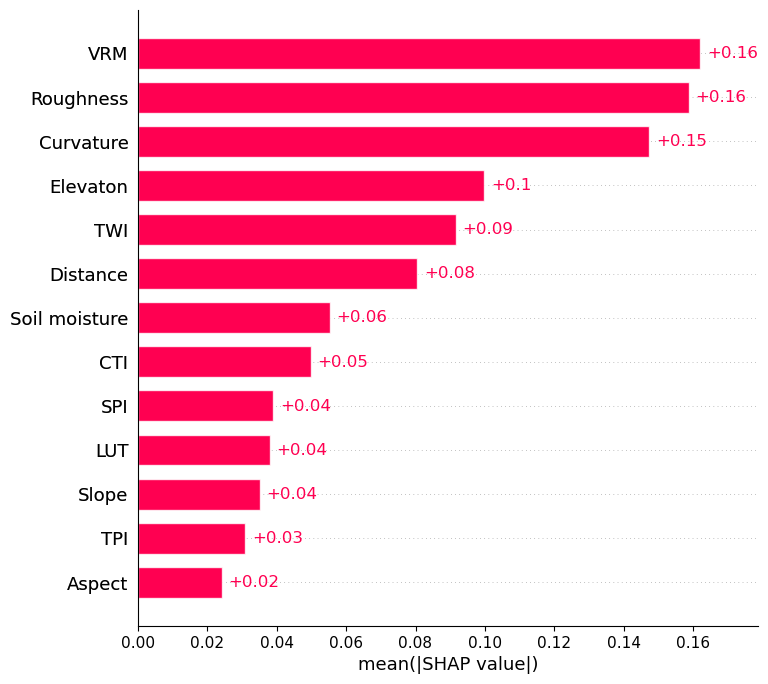

In [ ]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. 读取 Excel 数据
# file_path = r"C:\Users\la136\Desktop\因子识别.xlsx"
# df = pd.read_excel(file_path,sheet_name='123_4_均衡')
df=pd.read_excel(r"C:\Users\la136\Desktop\2重投顺利\数据集\多分类训练.xlsx", sheet_name='三分类均衡')
# 2. 拆分特征和标签
X = df.drop(columns=["label"])
y = df["label"]

# 可选：如果 label 是分类字符串，转换成数字
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)
    is_classification = True
else:
    is_classification = False

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 训练模型
model = xgb.XGBClassifier() if is_classification else xgb.XGBRegressor()
model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 解释模型
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# 6. 绘图（平均 SHAP 值条形图）
shap.plots.bar(shap_values, max_display=15, show=True)


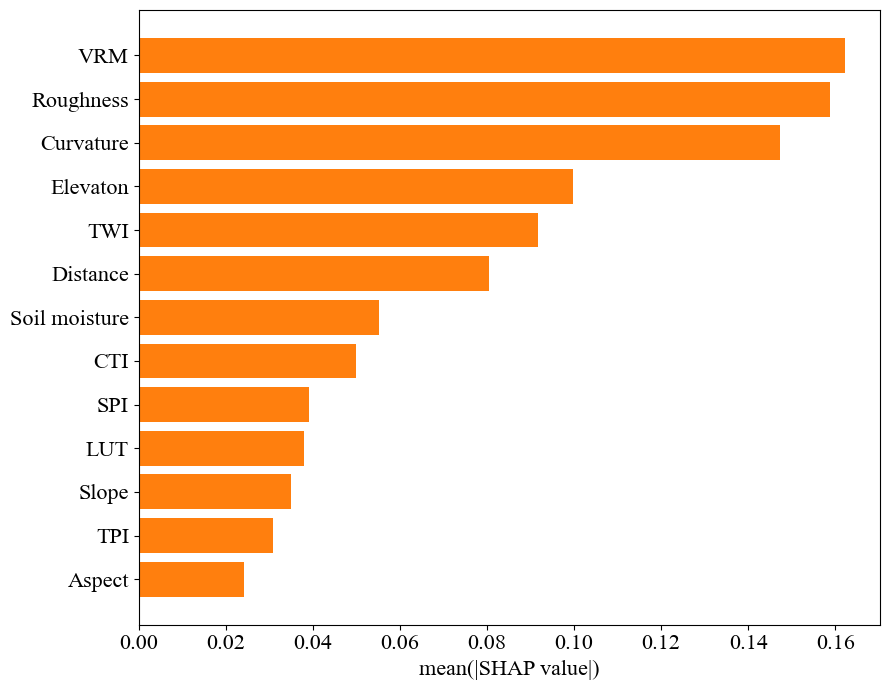

In [23]:
import shap
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体

# 计算 mean(|SHAP|) 用于排序
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
feature_names = X_train.columns
sorted_idx = np.argsort(mean_shap_values)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_shap = mean_shap_values[sorted_idx]

# 可视化（蓝色柱形图，字体放大）
plt.figure(figsize=(9, 7))
plt.barh(range(len(sorted_shap)), sorted_shap, color='#ff7f0e')  ##ff7f0e

plt.yticks(range(len(sorted_features)), sorted_features, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("mean(|SHAP value|)", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


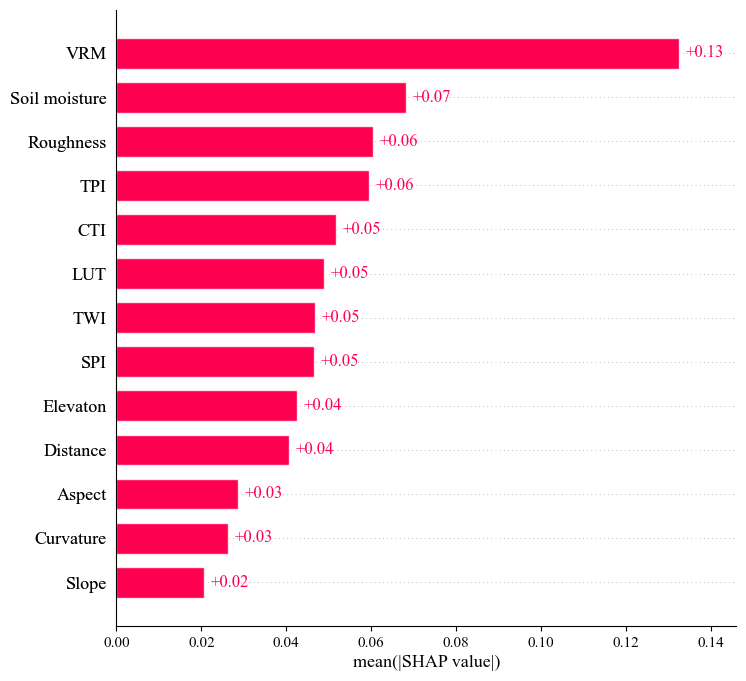

In [ ]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. 读取 Excel 数据
# file_path = r"C:\Users\la136\Desktop\因子识别.xlsx"
# df = pd.read_excel(file_path,sheet_name='123_4_均衡')
df = pd.read_excel(r"C:\Users\la136\Desktop\123和4.xlsx", sheet_name='461')
# 2. 拆分特征和标签
X = df.drop(columns=["label"])
y = df["label"]

# 可选：如果 label 是分类字符串，转换成数字
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)
    is_classification = True
else:
    is_classification = False

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 训练模型
model = xgb.XGBClassifier() if is_classification else xgb.XGBRegressor()
model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 解释模型
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# 6. 绘图（平均 SHAP 值条形图）
shap.plots.bar(shap_values, max_display=15, show=True)

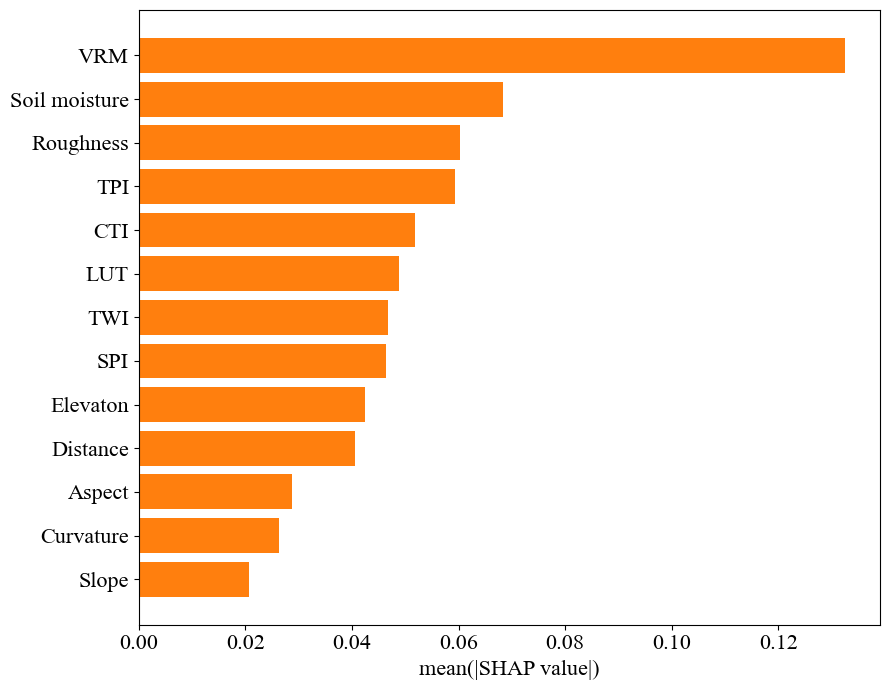

In [32]:
import shap
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体

# 计算 mean(|SHAP|) 用于排序
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
feature_names = X_train.columns
sorted_idx = np.argsort(mean_shap_values)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_shap = mean_shap_values[sorted_idx]

# 可视化（蓝色柱形图，字体放大）
plt.figure(figsize=(9, 7))
plt.barh(range(len(sorted_shap)), sorted_shap, color='#ff7f0e')  ##ff7f0e

plt.yticks(range(len(sorted_features)), sorted_features, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("mean(|SHAP value|)", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()